In [1]:
import webbrowser
import pyautogui, sys
import time
import tensorflow as tf
import mss
import mss.tools
from PIL import Image
import os
import numpy as np
from matplotlib import pyplot as plt
import random


#mouse control and window dimensions
SCREEN_WIDTH = 1920
SCREEN_HEIGHT = 1080
MONITOR_WIDTH = 800
MONITOR_HEIGHT = 600
X_OFFSET = 80
Y_OFFSET = 100
IMAGE_SIZE = (12, 8)

In [2]:
url = 'http://surviv.io'
# Open URL in a new tab, if a browser window is already open.
webbrowser.open_new_tab(url)
#pyautogui.moveTo(1000, 610)   # moves mouse to X of 100, Y of 200.
time.sleep(2)
pyautogui.click(x=1000, y=610)
time.sleep(2)
monitor = {'top': Y_OFFSET, 'left': X_OFFSET, 'width': SCREEN_WIDTH-X_OFFSET, 'height': SCREEN_HEIGHT-Y_OFFSET}

with mss.mss() as sct:
    # Get raw pixels from the screen
    sct_img = sct.grab(monitor)
    # Create the Image
    img = Image.frombytes("RGB", sct_img.size, sct_img.bgra, "raw", "BGRX")
    # The same, but less efficient:
    # img = Image.frombytes('RGB', sct_img.size, sct_img.rgb)
    screen = np.array(img)
    #screen = cv2.resize(screen, (MONITOR_WIDTH, MONITOR_HEIGHT))
    image_np = screen

## Screen

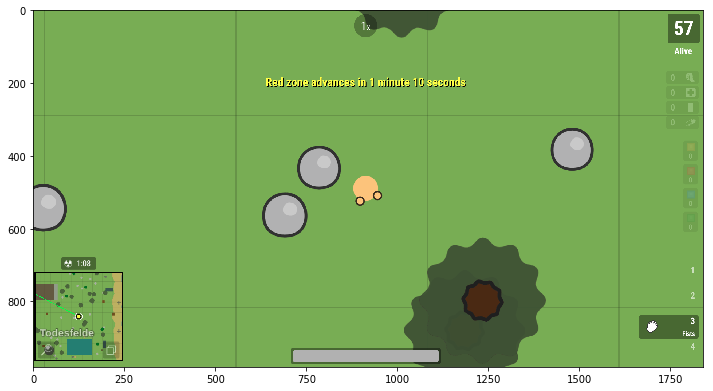

In [3]:
plt.figure(figsize=IMAGE_SIZE)
plt.imshow(image_np)

## Life Bar

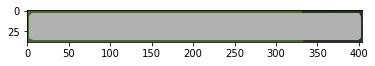

In [4]:
lifebar_x1 = 711 
lifebar_x2 = 1115
lifebar_y1 = 930
lifebar_y2 = 968

plt.imshow(image_np[lifebar_y1:lifebar_y2,lifebar_x1:lifebar_x2])

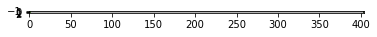

In [5]:
plt.imshow(image_np[int((lifebar_y1+lifebar_y2)/2)-1:int((lifebar_y1+lifebar_y2)/2)+1,lifebar_x1:lifebar_x2])

muerto


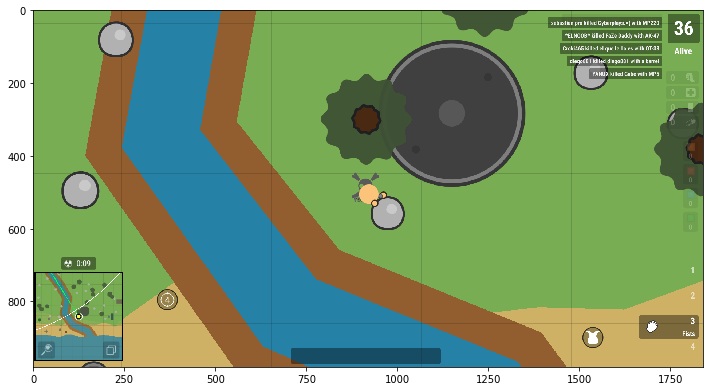

In [6]:
reds = []
greens = []
blues = []
means = []
sums = []
stds = []
last_red = 13000
last_std = 0
import math

while True:
    with mss.mss() as sct:
        # Get raw pixels from the screen
        sct_img = sct.grab(monitor)
        # Create the Image
        img = Image.frombytes("RGB", sct_img.size, sct_img.bgra, "raw", "BGRX")
        # The same, but less efficient:
        # img = Image.frombytes('RGB', sct_img.size, sct_img.rgb)
        screen = np.array(img)
        #screen = cv2.resize(screen, (MONITOR_WIDTH, MONITOR_HEIGHT))
        image_np = screen
        hp = image_np[int((lifebar_y1+lifebar_y2)/2)-1:int((lifebar_y1+lifebar_y2)/2)+1,lifebar_x1:lifebar_x2]
        red = np.sum(hp[:,:,0])
        std = np.std(hp)
        reds.append(np.sum(hp[:,:,0]))
        greens.append(np.sum(hp[:,:,1]))
        blues.append(np.sum(hp[:,:,2]))
        means.append(np.mean(hp))
        sums.append(np.sum(hp))
        stds.append(np.std(hp))
        if red < 60000 and std == last_std: #math.isclose(std, last_std, rel_tol=1e-5):
            print('muerto')
            break
        last_std = std
plt.figure(figsize=IMAGE_SIZE)
plt.imshow(image_np)      

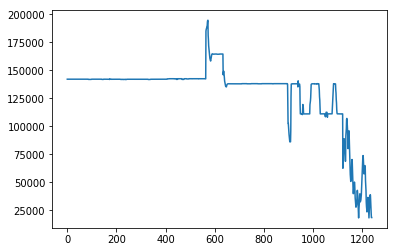

In [7]:
plt.plot(reds)

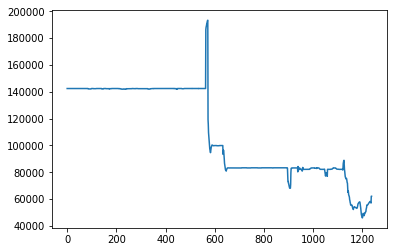

In [16]:
plt.plot(greens)

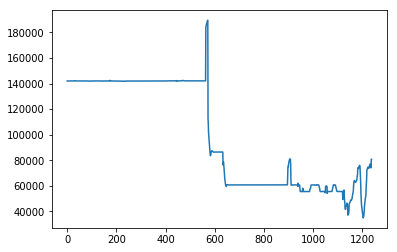

In [17]:
plt.plot(blues)

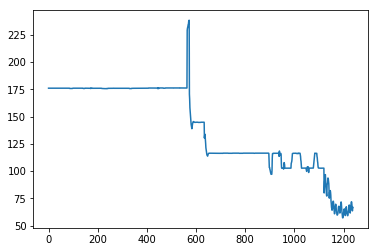

In [18]:
plt.plot(means)

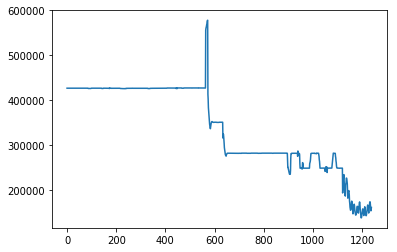

In [23]:
plt.plot(sums)

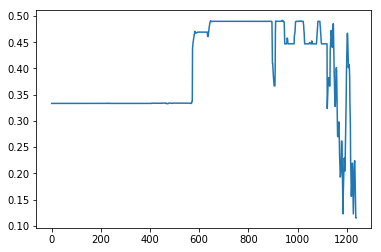

In [22]:
plt.plot(np.array(reds)/np.array(sums))

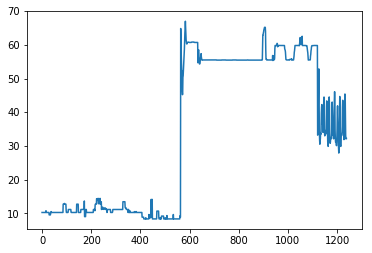

In [20]:
plt.plot(stds)

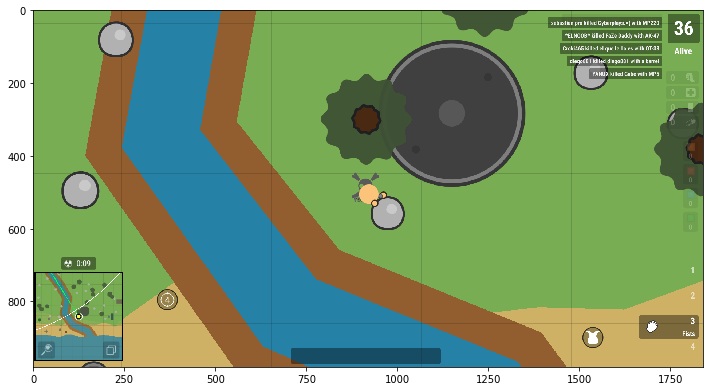

In [14]:
plt.figure(figsize=(IMAGE_SIZE))
plt.imshow(image_np)

In [15]:
reds

[142176,
 142176,
 142176,
 142176,
 142176,
 142176,
 142176,
 142176,
 142176,
 142176,
 142176,
 142176,
 142176,
 142176,
 142176,
 142176,
 142136,
 142176,
 142176,
 142176,
 142176,
 142176,
 142176,
 142176,
 142176,
 142176,
 142176,
 142176,
 142176,
 142244,
 142244,
 142244,
 142244,
 142244,
 142244,
 142176,
 142176,
 142156,
 142176,
 142176,
 142176,
 142176,
 142176,
 142176,
 142176,
 142176,
 142176,
 142176,
 142176,
 142176,
 142176,
 142176,
 142176,
 142176,
 142176,
 142176,
 142176,
 142176,
 142176,
 142176,
 142176,
 142176,
 142176,
 142176,
 142176,
 142176,
 142176,
 142176,
 142176,
 142176,
 142176,
 142176,
 142176,
 142176,
 142176,
 142176,
 142176,
 142176,
 142176,
 142176,
 142176,
 142176,
 142176,
 142176,
 142176,
 142176,
 141978,
 141978,
 141978,
 141978,
 141978,
 141958,
 141978,
 141978,
 141978,
 141978,
 141978,
 141978,
 142116,
 142176,
 142176,
 142176,
 142176,
 142176,
 142176,
 142176,
 142172,
 142110,
 142110,
 142110,
 142110,
 